In [85]:
import numpy as np
import torch
import torch.nn as nn
import csv
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import time

In [86]:
from setup_dataset import *

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
data = dataset(match_list=[1, 2, 3, 4, 5],
               start_frame = 1,
               end_frame = 1020
              )

Successfully loaded NPZ.
Successfully loaded NPZ.
Successfully loaded NPZ.
Successfully loaded NPZ.
Successfully loaded NPZ.


In [43]:
data.data

array([[[[0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         ...,
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275]],

        [[0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.15686275],
         ...,
         [0.15686275, 0.15686275, 0.15686275, ..., 0.15686275,
          0.15686275, 0.1

In [156]:
data = chunk_dataset(match_list=[1, 2, 3, 4, 5],
                     start_frame = 1,
                     end_frame = 1020
                    )

Successfully loaded NPZ.
Successfully loaded NPZ.
Successfully loaded NPZ.
Successfully loaded NPZ.
Successfully loaded NPZ.
Do you want to use GPU (y/n)y
GPU is available


In [157]:
data.data

[tensor([[[0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          ...,
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569]],
 
         [[0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          ...,
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569]],
 
         [[0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
          [0.1569, 0.1569, 0.1569,  ...,

In [158]:
data.padSequence()

In [161]:
data.data = data.data.reshape(624, 62, 10000)

In [162]:
data.packPaddedSequence()

In [163]:
data.data

PackedSequence(data=tensor([[0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
        [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
        [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
        ...,
        [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
        [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569],
        [0.1569, 0.1569, 0.1569,  ..., 0.1569, 0.1569, 0.1569]]), batch_sizes=tensor([624, 590, 543, 436, 363, 316, 266, 231, 198, 173, 150, 128, 102,  91,
         78,  70,  59,  53,  41,  33,  27,  22,  22,  20,  18,  17,  15,  15,
         13,  13,  12,  10,   9,   7,   6,   6,   6,   5,   5,   5,   5,   5,
          5,   4,   4,   4,   4,   4,   4,   4,   4,   4,   2,   2,   2,   2,
          2,   2,   2,   1,   1,   1]), sorted_indices=tensor([  0, 520, 352, 600, 201, 256, 308, 566, 364, 353, 121, 268,  10, 569,
        258,   2, 426, 365,  40, 168, 241, 507, 186, 357, 142, 309, 291,   4,
        619, 300, 261, 143,  16,   9, 585,  29

In [165]:
device = data.device
input_size = data.data_size[2] * data.data_size[3]
output_size = len(data.available_targets)
match_list = data.match_list
start_frame = data.start_frame
end_frame = data.end_frame

In [184]:
from setup_model import *

In [203]:
myModelStructure = ModelStructure(device, input_size, output_size, match_list, start_frame, end_frame)

Number of hidden neurons: 200
Number of epochs: 100
Choose type of RNN model:
1 - Simple RNN
2 - LSTM
3 - CNN
type: 1
write a observations without space and punctuations:teste
models/RNN_teste_m1-2-3-4-5_f1to1020_epoch100_H200 created


In [204]:
myModelStructure.model

RNNModel(
  (rnn): RNN(10000, 200, batch_first=True)
  (fc): Linear(in_features=200, out_features=9, bias=True)
  (out): Softmax(dim=None)
)

In [205]:
mymodel = myModelStructure.model.cuda()
X_train = data.data.cuda() 
Y_train = data.targets.cuda()

In [206]:
def get_acc(predicted, target):
    
    predicted = torch.argmax(predicted, axis=1)
    target = torch.argmax(target, axis=1)

    correct = torch.sum(predicted == target)

    acc = correct/predicted.shape[0]
    return float(acc)

In [207]:
train_loss_arr = np.array([])
train_acc_arr = np.array([])

In [210]:
start_time_processing = time.time()

# Training Run
loss_file = open(myModelStructure.path + '/' + "loss_file.txt", "w")
first_time = True

best_loss = 1
first_epoch = True

for epoch in range(1, myModelStructure.n_epochs + 1):

    mymodel.train()

    myModelStructure.optimizer.zero_grad() # Clears existing gradients from previous epoch
    output = mymodel(X_train)
    loss = myModelStructure.criterion(output, Y_train.view(-1,data.target_size[2]).float())
    loss.backward() # Does backpropagation and calculates gradients
    myModelStructure.optimizer.step() # Updates the weights accordinglyw
        
    if epoch%10 == 0:

        train_loss_arr = np.append(train_loss_arr, loss.item())
        train_acc_arr  = np.append(train_acc_arr, myModelStructure.get_acc(output, Y_train.reshape(-1, len(data.available_targets))))
        
        loss_file.write("Epoch: {}/{}-------------------------------------------\n".format(epoch, myModelStructure.n_epochs))
        loss_file.write("Train -> Loss: {:.15f} Acc: {:.15f}\n".format(train_loss_arr[-1], train_acc_arr[-1]))
            
        print("Epoch: {}/{}-------------------------------------------".format(epoch, myModelStructure.n_epochs))
        print("Train -> Loss: {:.15f} Acc: {:.15f}".format(train_loss_arr[-1], train_acc_arr[-1]))
        
        if train_loss_arr[-1] < best_loss:
            state = { 'epoch': epoch + 1, 'state_dict': model.state_dict(),
                      'optimizer': myModelStructure.optimizer.state_dict(), 'losslogger': loss.item(), }
            torch.save(state, myModelStructure.path + '/' + myModelStructure.name)
            best_loss = loss.item()
        else:
            print("model not saved")
            
loss_file.write("--- %s seconds ---" % (time.time() - start_time_processing))
loss_file.close()
np.savez(myModelStructure.path + '/' + "train_loss_arr", train_loss_arr)
print("--- %s seconds ---" % (time.time() - start_time_processing))

Epoch: 10/100-------------------------------------------
Train -> Loss: 0.019252615049481 Acc: 0.074389994144440
Epoch: 20/100-------------------------------------------
Train -> Loss: 0.019160145893693 Acc: 0.074881099164486
Epoch: 30/100-------------------------------------------
Train -> Loss: 0.019074548035860 Acc: 0.075113728642464
Epoch: 40/100-------------------------------------------
Train -> Loss: 0.019021987915039 Acc: 0.075294665992260
Epoch: 50/100-------------------------------------------
Train -> Loss: 0.018969498574734 Acc: 0.075294665992260
Epoch: 60/100-------------------------------------------
Train -> Loss: 0.018918151035905 Acc: 0.950501441955566
Epoch: 70/100-------------------------------------------
Train -> Loss: 0.018873210996389 Acc: 0.950320541858673
Epoch: 80/100-------------------------------------------
Train -> Loss: 0.018832242116332 Acc: 0.950553178787231
Epoch: 90/100-------------------------------------------
Train -> Loss: 0.018785411491990 Acc: 0

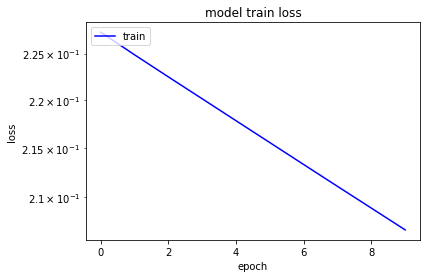

In [27]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.clf()
plt.plot(train_loss_arr, color='blue')
plt.title('model train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.yscale('log')
plt.savefig(newpath + '/' + 'train_loss.png')

In [72]:
lambda data.available_targets

SyntaxError: invalid syntax (<ipython-input-72-a7cc25a4d64a>, line 1)